# **TENET: Movie Review Text Analysis**
------------------------------------

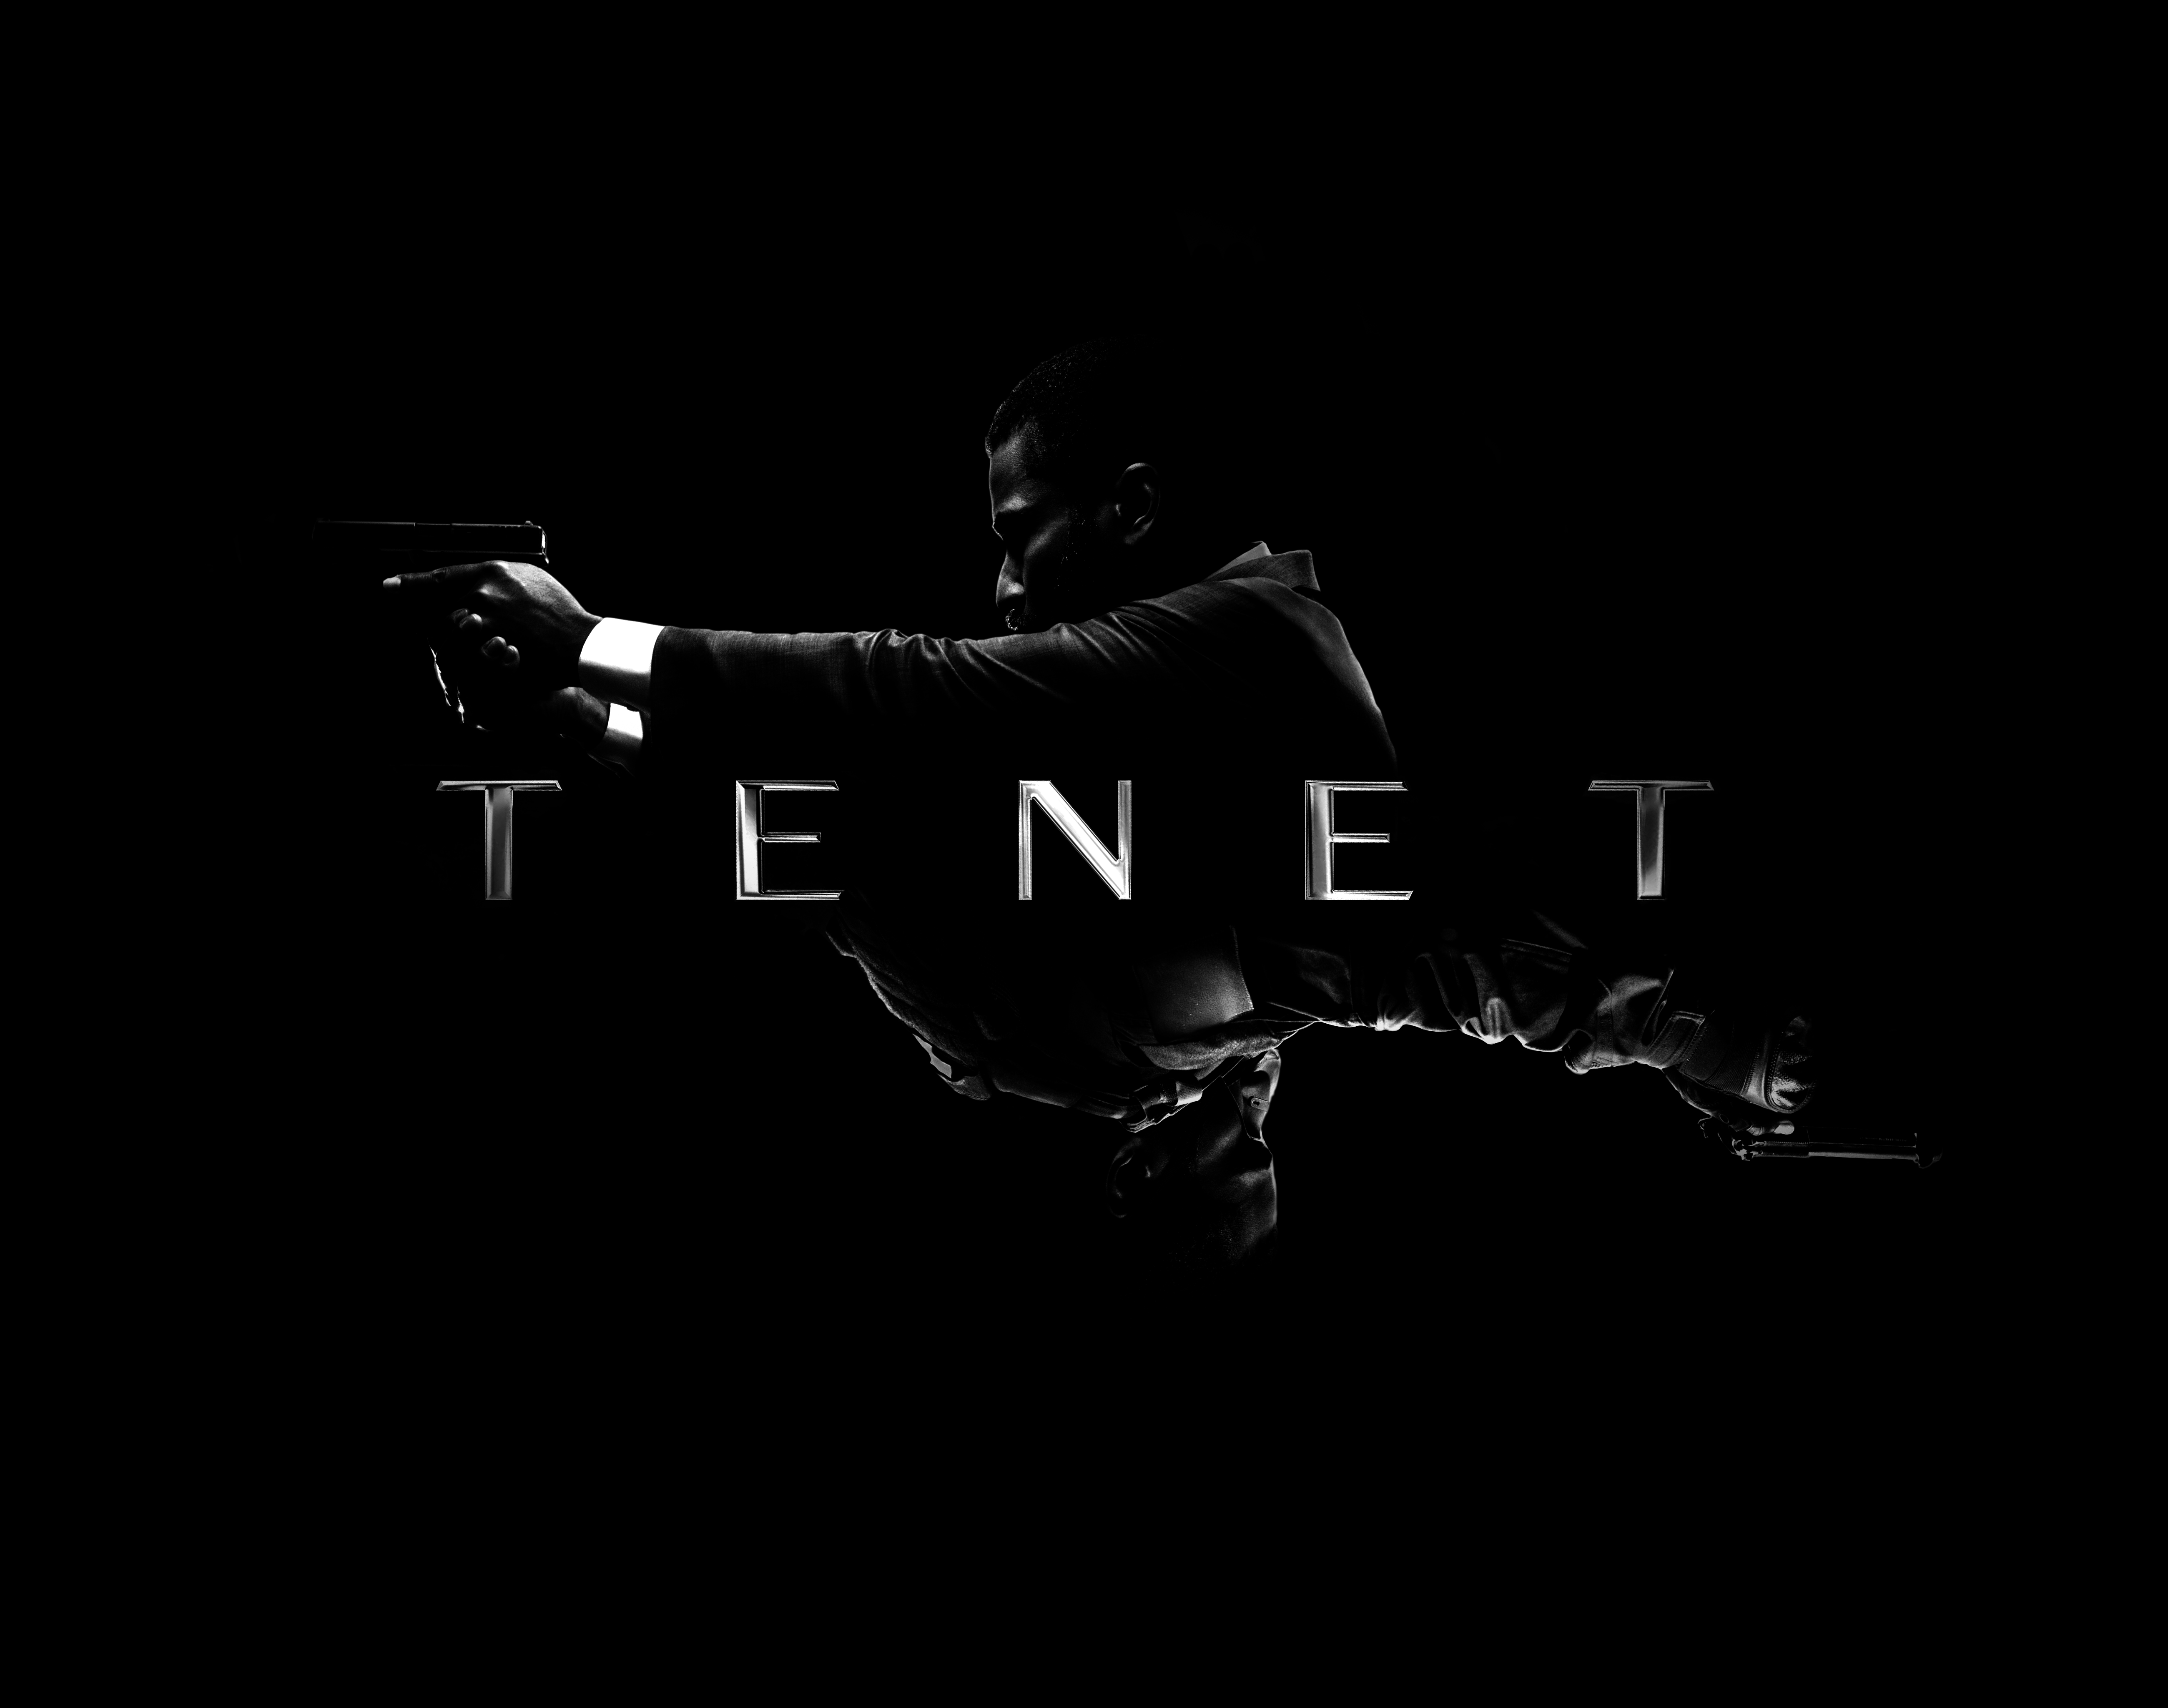

**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

**Reading and Understanding Dataset**

In [2]:
df = pd.read_csv('tenet_movie_reviews.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5270 non-null   int64  
 1   author      5270 non-null   object 
 2   url         5270 non-null   object 
 3   date        5270 non-null   object 
 4   rating      5178 non-null   float64
 5   review      5270 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 247.2+ KB


In [4]:
df.head(10)

,Unnamed: 0,author,url,date,rating,review
0,0,paulclaassen,https://www.imdb.com/review/rw8032959/?ref_=tt...,4 April 2022,5.0,"Over-complicated, way too long, and not all th..."
1,1,neil-476,https://www.imdb.com/review/rw6050469/?ref_=tt...,31 August 2020,5.0,Far too clever for its own good
2,2,TxMike,https://www.imdb.com/review/rw6580036/?ref_=tt...,9 February 2021,NaN,"Interesting concept, good story, could have be..."
3,3,pedroborges-90881,https://www.imdb.com/review/rw6217957/?ref_=tt...,30 October 2020,7.0,Tenet Review
4,4,ThomDerd,https://www.imdb.com/review/rw6131705/?ref_=tt...,28 September 2020,9.0,"If you are into movies, Tenet is your jam."
5,5,dierregi,https://www.imdb.com/review/rw6051247/?ref_=tt...,31 August 2020,1.0,Pretentious action movie
6,6,walter2-1,https://www.imdb.com/review/rw6046585/?ref_=tt...,30 August 2020,5.0,"Lots of potential, but chaotic and at tee end,..."
7,7,A_Different_Drummer,https://www.imdb.com/review/rw6437752/?ref_=tt...,3 January 2021,4.0,Momento was a cry for help ...
8,8,leftbanker-1,https://www.imdb.com/review/rw6320553/?ref_=tt...,29 November 2020,1.0,I'm Pretty Stupid but This Managed to Totally ...
9,9,claudio_carvalho,https://www.imdb.com/review/rw7547674/?ref_=tt...,14 November 2021,5.0,Another Overrated Mess by Christopher Nolan


In [5]:
df.tail(10)

,Unnamed: 0,author,url,date,rating,review
5260,5260,therealtestmann,https://www.imdb.com/review/rw6044577/?ref_=tt...,30 August 2020,8.0,A time travel Bond movie
5261,5261,calebnew,https://www.imdb.com/review/rw6991609/?ref_=tt...,2 June 2021,8.0,Absolute masterpiece
5262,5262,donafahad-95656,https://www.imdb.com/review/rw6049800/?ref_=tt...,31 August 2020,8.0,Nolan is a freaking genius
5263,5263,nonamefilmsllc,https://www.imdb.com/review/rw6053864/?ref_=tt...,1 September 2020,7.0,Momento on Steroids
5264,5264,keerthangs,https://www.imdb.com/review/rw6339526/?ref_=tt...,5 December 2020,9.0,Amazing
5265,5265,bekkosm,https://www.imdb.com/review/rw6919358/?ref_=tt...,14 May 2021,10.0,"No, the plot is not too complicated. You're dumb."
5266,5266,jayinkhatri-23593,https://www.imdb.com/review/rw6903109/?ref_=tt...,11 May 2021,5.0,Dragged
5267,5267,antebotica-01074,https://www.imdb.com/review/rw6033806/?ref_=tt...,28 August 2020,3.0,The waste of time
5268,5268,timi9,https://www.imdb.com/review/rw6370173/?ref_=tt...,16 December 2020,5.0,Too confusing
5269,5269,xristosxankc,https://www.imdb.com/review/rw6390261/?ref_=tt...,22 December 2020,10.0,Two times on a day


In [6]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 5270
Columns: 6


In [7]:
df.describe()

,Unnamed: 0,rating
count,5270.00000,5178.000000
mean,2634.50000,6.003283
std,1521.46229,3.112188
min,0.00000,1.000000
25%,1317.25000,3.000000
50%,2634.50000,6.000000
75%,3951.75000,9.000000
max,5269.00000,10.000000


In [8]:
print('Maximum Rating given by any author: 10')
print('Minimum Rating given by any author: 1')
print('Average Rating: 6')

print('-'*50)

print('Total Rating: 5178')
print('Total Rows: 5270')


Maximum Rating given by any author: 10
Minimum Rating given by any author: 1
Average Rating: 6
--------------------------------------------------
Total Rating: 5178
Total Rows: 5270


Observed:
- Rating Column seems to have missing values

**Removing Unwanted column/s**

In [9]:
print(f'list of all columns available: {df.columns}')

list of all columns available: Index(['Unnamed: 0', 'author', 'url', 'date', 'rating', 'review'], dtype='object')


In [10]:
# remove column 'Unnamed:0'
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.head(2)

,author,url,date,rating,review
0,paulclaassen,https://www.imdb.com/review/rw8032959/?ref_=tt...,4 April 2022,5.0,"Over-complicated, way too long, and not all th..."
1,neil-476,https://www.imdb.com/review/rw6050469/?ref_=tt...,31 August 2020,5.0,Far too clever for its own good


**Missing Value Treatment**

In [12]:
# to check for total missing values in each column
df.isnull().sum()

author     0
url        0
date       0
rating    92
review     0
dtype: int64

In [13]:
# % of missing value in each column
print(f'''% of missing value in each Column:

{(df.isnull().sum() / df.shape[0])*100}''')

% of missing value in each Column:

author    0.000000
url       0.000000
date      0.000000
rating    1.745731
review    0.000000
dtype: float64


Observation
- Rating Column has 1.75% of missing value
- As the % is very less and the rating missing values can't be imputed as NA or 0
- Will drop such rows as it will not impact the duture analysis

In [14]:
# drop rows having rating column has null
df.dropna(how='any',axis=0,inplace=True)

In [15]:
df.isnull().sum()

author    0
url       0
date      0
rating    0
review    0
dtype: int64

In [16]:
# % of missing value in each column
print(f'''% of missing value in each Column:

{(df.isnull().sum() / df.shape[0])*100}''')

% of missing value in each Column:

author    0.0
url       0.0
date      0.0
rating    0.0
review    0.0
dtype: float64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5178 entries, 0 to 5269
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   author  5178 non-null   object 
 1   url     5178 non-null   object 
 2   date    5178 non-null   object 
 3   rating  5178 non-null   float64
 4   review  5178 non-null   object 
dtypes: float64(1), object(4)
memory usage: 242.7+ KB


**Data Cleaning**

----------------------
##### 'author': column

In [18]:
df['author'].head()

0         paulclaassen
1             neil-476
3    pedroborges-90881
4             ThomDerd
5             dierregi
Name: author, dtype: object

In [19]:
df['author'].tail()

5265              bekkosm
5266    jayinkhatri-23593
5267     antebotica-01074
5268                timi9
5269         xristosxankc
Name: author, dtype: object

Observation
- author names have digits intact within the string
- need to remove such digits 

In [20]:
# to remove any digit from [0-9] with one or more repetition and replace with ''
df['author'] = df['author'].str.replace('\d+', '')

In [21]:
df['author'].head()

0    paulclaassen
1           neil-
3    pedroborges-
4        ThomDerd
5        dierregi
Name: author, dtype: object

In [22]:
df['author'].tail()

5265         bekkosm
5266    jayinkhatri-
5267     antebotica-
5268            timi
5269    xristosxankc
Name: author, dtype: object

Observation
- can be seen that some author names have [-] as special character
- will replace - with ''

In [23]:
df['author'] = df['author'].str.replace('-', '')

In [24]:
df['author'].head()

0    paulclaassen
1            neil
3     pedroborges
4        ThomDerd
5        dierregi
Name: author, dtype: object

In [25]:
df['author'].tail()

5265         bekkosm
5266     jayinkhatri
5267      antebotica
5268            timi
5269    xristosxankc
Name: author, dtype: object

In [26]:
# will check for any digit still available in author column
df['author'].str.isdigit().any()

False

Observation
- no digit available in author column
- will now check any emtpy string in author column and will replace with 'Author:Not Available'

**Note**
- before moving forward as we have remove some rows from the dataset it may have affect the index
- lets check it out

In [27]:
df.index

Int64Index([   0,    1,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            5260, 5261, 5262, 5263, 5264, 5265, 5266, 5267, 5268, 5269],
           dtype='int64', length=5178)

Observation
- clearly sees that the index of dataframe has been affected 
- will reset the index first and then move forward with the analysis

In [28]:
df = df.reset_index()
df.index

RangeIndex(start=0, stop=5178, step=1)

Observation
- index back to normal
- will now check any emtpy string in author column and will replace with 'Author:Not Available'

In [29]:
# will check for those rows having author as empty string
df[df['author'] == '']

,index,author,url,date,rating,review
9,10,,https://www.imdb.com/review/rw6029039/?ref_=tt...,26 August 2020,6.0,First real disappointment from Mr. Christopher...


Observation
- row:9 has the author as empty string

**Note**
- before moving forward with empty string cleaning process
- we can see an unwanted column [index] created as we have reset the index
- will drop this unwanted column first

In [30]:
df.drop('index',axis=1,inplace=True)
df.head(2)

,author,url,date,rating,review
0,paulclaassen,https://www.imdb.com/review/rw8032959/?ref_=tt...,4 April 2022,5.0,"Over-complicated, way too long, and not all th..."
1,neil,https://www.imdb.com/review/rw6050469/?ref_=tt...,31 August 2020,5.0,Far too clever for its own good


In [31]:
# will overcome the empty string in auithor column
df[df['author']=='']

,author,url,date,rating,review
9,,https://www.imdb.com/review/rw6029039/?ref_=tt...,26 August 2020,6.0,First real disappointment from Mr. Christopher...


In [32]:
df['author'][9]

''

In [33]:
df['author'][9] == ''

True

In [34]:
for i in range(len(df)):
    if (df['author'][i] == ''):
        df['author'][i] = 'Author:Not Available'

In [35]:
df[df['author']=='']

,author,url,date,rating,review


In [36]:
df[df['author']=='Author:Not Available']

,author,url,date,rating,review
9,Author:Not Available,https://www.imdb.com/review/rw6029039/?ref_=tt...,26 August 2020,6.0,First real disappointment from Mr. Christopher...


----------------------
##### 'date': column

In [37]:
df['date'].dtype

dtype('O')

In [38]:
df['date'].head()

0         4 April 2022
1       31 August 2020
2      30 October 2020
3    28 September 2020
4       31 August 2020
Name: date, dtype: object

In [39]:
df['date'] = pd.to_datetime(df['date']) #object to datetime data type of date column

In [40]:
df['date'].head()

0   2022-04-04
1   2020-08-31
2   2020-10-30
3   2020-09-28
4   2020-08-31
Name: date, dtype: datetime64[ns]

In [41]:
# to check the machine date format
import datetime

today = datetime.datetime.now()
print("The Current Date and Time is:", today)

The Current Date and Time is: 2022-08-16 11:34:07.505965


----------------------

In [42]:
df.head(10)

,author,url,date,rating,review
0,paulclaassen,https://www.imdb.com/review/rw8032959/?ref_=tt...,2022-04-04,5.0,"Over-complicated, way too long, and not all th..."
1,neil,https://www.imdb.com/review/rw6050469/?ref_=tt...,2020-08-31,5.0,Far too clever for its own good
2,pedroborges,https://www.imdb.com/review/rw6217957/?ref_=tt...,2020-10-30,7.0,Tenet Review
3,ThomDerd,https://www.imdb.com/review/rw6131705/?ref_=tt...,2020-09-28,9.0,"If you are into movies, Tenet is your jam."
4,dierregi,https://www.imdb.com/review/rw6051247/?ref_=tt...,2020-08-31,1.0,Pretentious action movie
5,walter,https://www.imdb.com/review/rw6046585/?ref_=tt...,2020-08-30,5.0,"Lots of potential, but chaotic and at tee end,..."
6,A_Different_Drummer,https://www.imdb.com/review/rw6437752/?ref_=tt...,2021-01-03,4.0,Momento was a cry for help ...
7,leftbanker,https://www.imdb.com/review/rw6320553/?ref_=tt...,2020-11-29,1.0,I'm Pretty Stupid but This Managed to Totally ...
8,claudio_carvalho,https://www.imdb.com/review/rw7547674/?ref_=tt...,2021-11-14,5.0,Another Overrated Mess by Christopher Nolan
9,Author:Not Available,https://www.imdb.com/review/rw6029039/?ref_=tt...,2020-08-26,6.0,First real disappointment from Mr. Christopher...


-----------

**EDA**

In [43]:
df[['date','review']].head()

,date,review
0,2022-04-04,"Over-complicated, way too long, and not all th..."
1,2020-08-31,Far too clever for its own good
2,2020-10-30,Tenet Review
3,2020-09-28,"If you are into movies, Tenet is your jam."
4,2020-08-31,Pretentious action movie


In [44]:
df.head(2)

,author,url,date,rating,review
0,paulclaassen,https://www.imdb.com/review/rw8032959/?ref_=tt...,2022-04-04,5.0,"Over-complicated, way too long, and not all th..."
1,neil,https://www.imdb.com/review/rw6050469/?ref_=tt...,2020-08-31,5.0,Far too clever for its own good


In [45]:
# creating 'year' column extracted from'date' column

df['year'] = df['date'].dt.year
df.head(2)

,author,url,date,rating,review,year
0,paulclaassen,https://www.imdb.com/review/rw8032959/?ref_=tt...,2022-04-04,5.0,"Over-complicated, way too long, and not all th...",2022
1,neil,https://www.imdb.com/review/rw6050469/?ref_=tt...,2020-08-31,5.0,Far too clever for its own good,2020


In [46]:
# year wise count of reviews for the movie
df.groupby('year')['review'].count()

year
2020    3401
2021    1583
2022     194
Name: review, dtype: int64

importing necessary library for visualisation

In [47]:
import matplotlib.pyplot as plt # importing matplotlib visualisation library

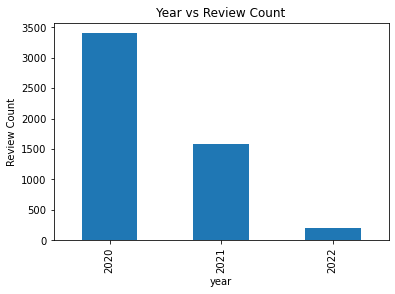

In [48]:
# year wise count of reviews for the movie - visulaisation
df.groupby('year')['review'].count().plot(kind='bar')
plt.title('Year vs Review Count')
plt.ylabel('Review Count')
plt.show()

Observation
- As the year passes on, the number of reviews 'TENET' movie accuired on 'IMDB' website reduced drastically
- From around 3.5k to approx 200
- This shows that this movie got a huge hype in first year of release and viewers shower there emotions with large chuck of reviews
- But later on the hype of movie got lost somehow and not became Nolan's Cult Classic Movie

**Lets Deep Dive in 'Review' Column and explore the text**

In [49]:
df['review']

0       Over-complicated, way too long, and not all th...
1                         Far too clever for its own good
2                                            Tenet Review
3              If you are into movies, Tenet is your jam.
4                                Pretentious action movie
                              ...                        
5173    No, the plot is not too complicated. You're dumb.
5174                                              Dragged
5175                                    The waste of time
5176                                        Too confusing
5177                                   Two times on a day
Name: review, Length: 5178, dtype: object

In [50]:
for i in range(5):
    #print(i)
    print('rating:',df['rating'][i])
    print(df['review'][i])
    print(len(df['review'][i]))
    print('\n--------------------------')

rating: 5.0
Over-complicated, way too long, and not all that exciting.
58

--------------------------
rating: 5.0
Far too clever for its own good
31

--------------------------
rating: 7.0
Tenet Review
12

--------------------------
rating: 9.0
If you are into movies, Tenet is your jam.
42

--------------------------
rating: 1.0
Pretentious action movie
24

--------------------------


Observation
- a slight look of having some relationship between length of the review and the rating provided by reviewer
- lets deep dive

In [51]:
df['review_length'] = 0

In [52]:
df.head(2)

,author,url,date,rating,review,year,review_length
0,paulclaassen,https://www.imdb.com/review/rw8032959/?ref_=tt...,2022-04-04,5.0,"Over-complicated, way too long, and not all th...",2022,0
1,neil,https://www.imdb.com/review/rw6050469/?ref_=tt...,2020-08-31,5.0,Far too clever for its own good,2020,0


In [53]:
for i in range(len(df)):
    df['review_length'][i] = round(len(df['review'][i]))

In [54]:
df.head()

,author,url,date,rating,review,year,review_length
0,paulclaassen,https://www.imdb.com/review/rw8032959/?ref_=tt...,2022-04-04,5.0,"Over-complicated, way too long, and not all th...",2022,58
1,neil,https://www.imdb.com/review/rw6050469/?ref_=tt...,2020-08-31,5.0,Far too clever for its own good,2020,31
2,pedroborges,https://www.imdb.com/review/rw6217957/?ref_=tt...,2020-10-30,7.0,Tenet Review,2020,12
3,ThomDerd,https://www.imdb.com/review/rw6131705/?ref_=tt...,2020-09-28,9.0,"If you are into movies, Tenet is your jam.",2020,42
4,dierregi,https://www.imdb.com/review/rw6051247/?ref_=tt...,2020-08-31,1.0,Pretentious action movie,2020,24


importing necessary library for visualisation

In [55]:
import seaborn as sns

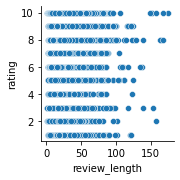

In [56]:
sns.pairplot(df,x_vars=['review_length'],y_vars=['rating'],kind='scatter')
plt.show()

Observation
- seems no such relationship between review length and rating

**Let's check count of reviews for each rating from 1 till 10**

In [57]:
df.groupby('rating')['review'].count()

rating
1.0     690
2.0     338
3.0     366
4.0     316
5.0     453
6.0     468
7.0     480
8.0     572
9.0     602
10.0    893
Name: review, dtype: int64

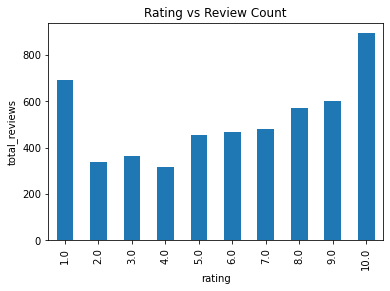

In [58]:
df.groupby('rating')['review'].count().plot(kind='bar')
plt.title('Rating vs Review Count')
plt.ylabel('total_reviews')
plt.show()

Observation
- maxium reviews written by the ones who gave the 10/10 rating: total = 893
- second_maximum review count by the ones who gave the least rating i.e. 1/10 = 690
- overall can be seen that the review count first decreased from rating 1 to rating 4 and then shoot up for each next rating till reached at rating 10 which huge review count

-----------------------------------------------------
#### **Sentiment Analysis**

importing Natural Language Toolkit

In [59]:
import nltk

In [60]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [61]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [62]:
sia = SentimentIntensityAnalyzer() #creating instance which returns a dic

In [63]:
string1 = "This is a good movie"
sia.polarity_scores(string1)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

- this shows that slightly positive statement

In [64]:
string2 = "This was the WORST movie that has ever disgraced the screen."
sia.polarity_scores(string2)

{'neg': 0.465, 'neu': 0.535, 'pos': 0.0, 'compound': -0.8331}

- very much negative statement

In [65]:
df['review'].head()

0    Over-complicated, way too long, and not all th...
1                      Far too clever for its own good
2                                         Tenet Review
3           If you are into movies, Tenet is your jam.
4                             Pretentious action movie
Name: review, dtype: object

In [66]:
type(df['review'][0])

str

In [67]:
# lets check if there any blank string in 'Review' column
blank_index = []

for i in range(5):
    if type(df['review'][i]) == str:
        if df['review'][i].isspace():
            blank_index.append(i)

In [68]:
blank_index

[]

Observation
- no review is a empty string

In [69]:
# lets check the polarity of first review
print(df['review'][0])
sia.polarity_scores(df['review'][0])

Over-complicated, way too long, and not all that exciting.


{'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.3875}

Observation
- looks like the first review is slight negative
- reason being:
    - positive is zero
    - negative is close to zero
    - neutral has upper hand
    - in totality, compount is < 0 hence negative value is less negative therefore slight negative
        - but it do comes under Negative Review Category

In [70]:
# lets check for all reviews we have
# and create a new column 'scores' on the basis of polarity

df['scores'] = df['review'].apply(lambda review: sia.polarity_scores(review))

In [71]:
df.head()

,author,url,date,rating,review,year,review_length,scores
0,paulclaassen,https://www.imdb.com/review/rw8032959/?ref_=tt...,2022-04-04,5.0,"Over-complicated, way too long, and not all th...",2022,58,"{'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'comp..."
1,neil,https://www.imdb.com/review/rw6050469/?ref_=tt...,2020-08-31,5.0,Far too clever for its own good,2020,31,"{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'comp..."
2,pedroborges,https://www.imdb.com/review/rw6217957/?ref_=tt...,2020-10-30,7.0,Tenet Review,2020,12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,ThomDerd,https://www.imdb.com/review/rw6131705/?ref_=tt...,2020-09-28,9.0,"If you are into movies, Tenet is your jam.",2020,42,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,dierregi,https://www.imdb.com/review/rw6051247/?ref_=tt...,2020-08-31,1.0,Pretentious action movie,2020,24,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


Observation
- now we have a dictionary of polarity for each review in a column called 'scores'
- lets take only compound out as it gives the better and clear picture os th review sentiment

In [72]:
df['compound_scores'] = df['scores'].apply(lambda d:d['compound'])

In [73]:
df.head()

,author,url,date,rating,review,year,review_length,scores,compound_scores
0,paulclaassen,https://www.imdb.com/review/rw8032959/?ref_=tt...,2022-04-04,5.0,"Over-complicated, way too long, and not all th...",2022,58,"{'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'comp...",-0.3875
1,neil,https://www.imdb.com/review/rw6050469/?ref_=tt...,2020-08-31,5.0,Far too clever for its own good,2020,31,"{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'comp...",0.7096
2,pedroborges,https://www.imdb.com/review/rw6217957/?ref_=tt...,2020-10-30,7.0,Tenet Review,2020,12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,ThomDerd,https://www.imdb.com/review/rw6131705/?ref_=tt...,2020-09-28,9.0,"If you are into movies, Tenet is your jam.",2020,42,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,dierregi,https://www.imdb.com/review/rw6051247/?ref_=tt...,2020-08-31,1.0,Pretentious action movie,2020,24,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


**Note**
- as we have compound_scores for each review available now
- will give each review its sentiment based on:
    - compound_scoe > 0: `positive`
    - compoud_score = 0: `neutral`
    - compoud_score < 0: `negative`

In [74]:
df['labels'] = np.nan

for i in range(len(df)):
    if df['compound_scores'][i] > 0:
        df['labels'][i] = 'positive'
    elif df['compound_scores'][i] == 0:
        df['labels'][i] = 'neutral'
    else:
        df['labels'][i] = 'negative'

In [75]:
df.head()

,author,url,date,rating,review,year,review_length,scores,compound_scores,labels
0,paulclaassen,https://www.imdb.com/review/rw8032959/?ref_=tt...,2022-04-04,5.0,"Over-complicated, way too long, and not all th...",2022,58,"{'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'comp...",-0.3875,negative
1,neil,https://www.imdb.com/review/rw6050469/?ref_=tt...,2020-08-31,5.0,Far too clever for its own good,2020,31,"{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'comp...",0.7096,positive
2,pedroborges,https://www.imdb.com/review/rw6217957/?ref_=tt...,2020-10-30,7.0,Tenet Review,2020,12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,ThomDerd,https://www.imdb.com/review/rw6131705/?ref_=tt...,2020-09-28,9.0,"If you are into movies, Tenet is your jam.",2020,42,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,dierregi,https://www.imdb.com/review/rw6051247/?ref_=tt...,2020-08-31,1.0,Pretentious action movie,2020,24,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


Observation
- looks like each review has now its own sentiment with it

In [76]:
df['labels'].value_counts()

neutral     2031
positive    1670
negative    1477
Name: labels, dtype: int64

In [77]:
(df['labels'].value_counts(normalize=True)*100).round(2)

neutral     39.22
positive    32.25
negative    28.52
Name: labels, dtype: float64

In [78]:
df['labels'].value_counts(ascending=True)

negative    1477
positive    1670
neutral     2031
Name: labels, dtype: int64

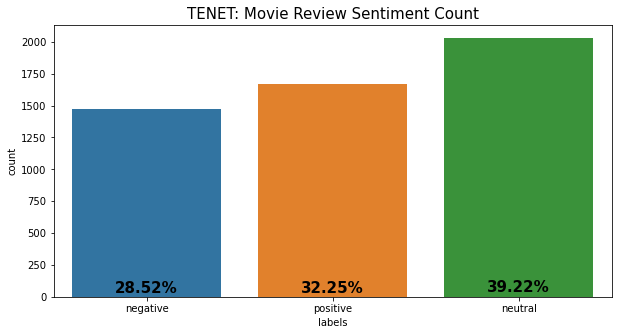

In [79]:
# inspect sentiment

plt.figure(figsize=[10,5])
sns.countplot(df.labels)
plt.title('TENET: Movie Review Sentiment Count', fontsize=15)

label = (df['labels'].value_counts(normalize=True,ascending=True)*100).round(2)
for i in range(3):
    plt.text(x = i, y = label[i], s=f'{label[i]}%', horizontalalignment='center',rotation=360, color="black", 
             weight="bold", fontsize=15)
    
plt.legend

plt.show()

Observation
- Total Reviews: 5178
- Out of which:
    - Maximum Reviews Count belong to 'Neutral Category' = 39.22% reviews
    - Minimum Review Count belongs to 'Negative Category' = 28.52% reviews

**Ratings > 7: Movie Reviews Sentiment Count**

In [80]:
rating_above_7_df = df[df['rating']>7]

In [81]:
rating_above_7_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 3 to 5177
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   author           2067 non-null   object        
 1   url              2067 non-null   object        
 2   date             2067 non-null   datetime64[ns]
 3   rating           2067 non-null   float64       
 4   review           2067 non-null   object        
 5   year             2067 non-null   int64         
 6   review_length    2067 non-null   int64         
 7   scores           2067 non-null   object        
 8   compound_scores  2067 non-null   float64       
 9   labels           2067 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 177.6+ KB


In [82]:
rating_above_7_df['labels'].value_counts(ascending=True)

negative     174
neutral      848
positive    1045
Name: labels, dtype: int64

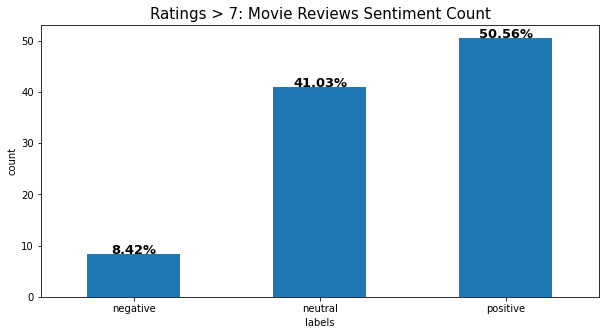

In [83]:
plt.figure(figsize=[10,5])

plt.title('Ratings > 7: Movie Reviews Sentiment Count',fontsize=15)
plt.ylabel('count')
plt.xlabel('labels')

(rating_above_7_df['labels'].value_counts(normalize=True,ascending=True)*100).plot(kind='bar')
plt.xticks(rotation=360)


label = (rating_above_7_df['labels'].value_counts(normalize=True,ascending=True)*100).round(2)
for i in range(3):
    plt.text(x = i, y = label[i], s=f'{label[i]}%', horizontalalignment='center',rotation=360, color="black", 
             weight="bold", fontsize=13)
    
plt.legend

plt.show()

Observation
- when ratings are above 7: 2067 reviews in total out of 5178
- reviews sentiment count will change as respect to overal sentiment count
- reason being:
    - Maximum Reviews Count belong to 'Positive Category' = 50.56% reviews
    - Minimum Review Count belongs to 'Negative Category' = 8.42% reviews

**Ratings < 7: Movie Reviews Sentiment Count**

In [84]:
rating_below_7_df = df[df['rating']<7]

In [85]:
rating_below_7_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2631 entries, 0 to 5176
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   author           2631 non-null   object        
 1   url              2631 non-null   object        
 2   date             2631 non-null   datetime64[ns]
 3   rating           2631 non-null   float64       
 4   review           2631 non-null   object        
 5   year             2631 non-null   int64         
 6   review_length    2631 non-null   int64         
 7   scores           2631 non-null   object        
 8   compound_scores  2631 non-null   float64       
 9   labels           2631 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 226.1+ KB


In [86]:
rating_below_7_df['labels'].value_counts(ascending=True)

positive     452
neutral      992
negative    1187
Name: labels, dtype: int64

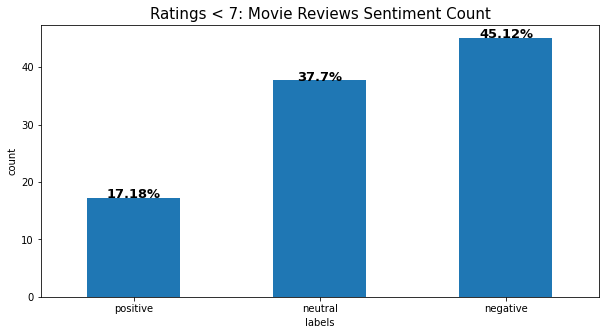

In [87]:
plt.figure(figsize=[10,5])

plt.title('Ratings < 7: Movie Reviews Sentiment Count',fontsize=15)
plt.ylabel('count')
plt.xlabel('labels')

(rating_below_7_df['labels'].value_counts(normalize=True,ascending=True)*100).plot(kind='bar')
plt.xticks(rotation=360)


label = (rating_below_7_df['labels'].value_counts(normalize=True,ascending=True)*100).round(2)
for i in range(3):
    plt.text(x = i, y = label[i], s=f'{label[i]}%', horizontalalignment='center',rotation=360, color="black", 
             weight="bold", fontsize=13)
    
plt.legend

plt.show()

Observation
- when ratings are below 7: 2631 reviews out of 5178
- reviews sentiment count will change as respect to overal sentiment count
- reason being:
    - Maximum Reviews Count belong to 'Negative Category' = 45.12% reviews
    - Minimum Review Count belongs to 'Positive Category' = 17.18% reviews

**Dataframe to CSV**

In [88]:
# saving the cleaned dataset along with sentiments into a csv file
df.to_csv('tenet_movie_reviews_cleaned_dataset.csv')

------
------

### **Conclusion**

- Total Reviews : 5178 after cleaning and handling missing values
    - Total Reviews when rating > 7: 2067
    - Total Reviews when rating< 7: 2631
        - this shows that maximum reviews are for ratings which are below 7

.................................................................................................................................................................................

- Ratings and Length of Reviews has no 'relationship'

.................................................................................................................................................................................

- Release date of Tenet Movie: Dec,2020
    - As year passes on till date,2022 the review counts has reduced drastically
    - From review count of `3401` in 2020 to just `194` in 2022 
        - shows that hype has reduced among cinephiles

.................................................................................................................................................................................
        
- Maximum reviews written by the ones who gave the 10/10 rating: total = 893
- Second_maximum review count by the ones who gave the least rating i.e. 1/10 = 690
    - Overall can be seen that the review count first decreased from rating 1 to rating 4 and then shoot up for each next rating till reached at rating 10 which huge review count

.................................................................................................................................................................................
    
- In total:
    - Positive Reviews are 32.25% of total
    - With maximum chunk is Neutral towards the TENET Movie in terms of sentiments: 39.22%

--------------------------------
**END**